# ライブラリ

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np

from function import eda_sales_quantity_abnormal_value

- データ読み込み

In [2]:
df = pd.read_csv('../processing_data/merged.csv', encoding='shift_jis')
# 浮動小数点数の表示フォーマットを指定
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# 売上個数異常値確認

In [3]:
df['売上個数'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1119570 entries, 0 to 1119569
Series name: 売上個数
Non-Null Count    Dtype
--------------    -----
1119570 non-null  int64
dtypes: int64(1)
memory usage: 8.5 MB


In [4]:
df['売上個数'].describe()

count   1119570.000
mean          1.128
std           0.789
min          -4.000
25%           1.000
50%           1.000
75%           1.000
max         151.000
Name: 売上個数, dtype: float64

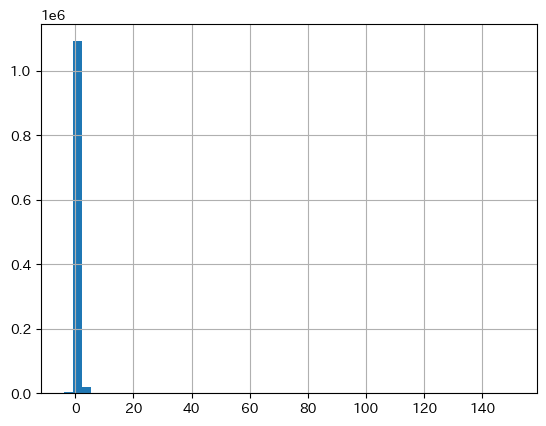

In [5]:
df['売上個数'].hist(bins=50)
plt.show()

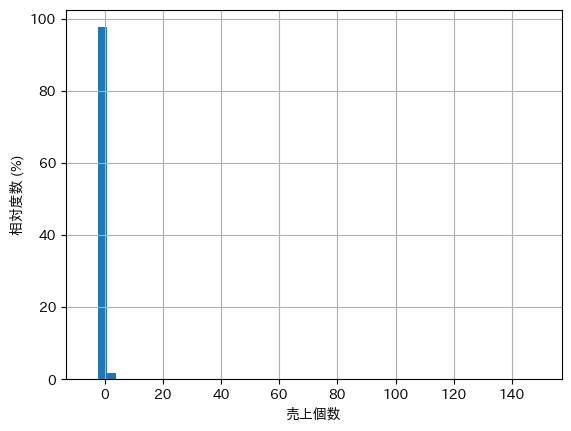

In [6]:
# ビンの境界を指定して相対度数を計算
bins = np.linspace(df['売上個数'].min(), df['売上個数'].max(), num=51)  # 51はビンの数+1
relative_freq = pd.cut(df['売上個数'], bins).value_counts(normalize=True, sort=False)

# ヒストグラムを描画
bin_widths = np.diff(bins)  # 各ビンの幅を計算
plt.bar(bins[:-1], relative_freq*100, width=bin_widths)

# プロットの設定
plt.xlabel('売上個数')
plt.ylabel('相対度数 (%)')
plt.grid()
plt.show()


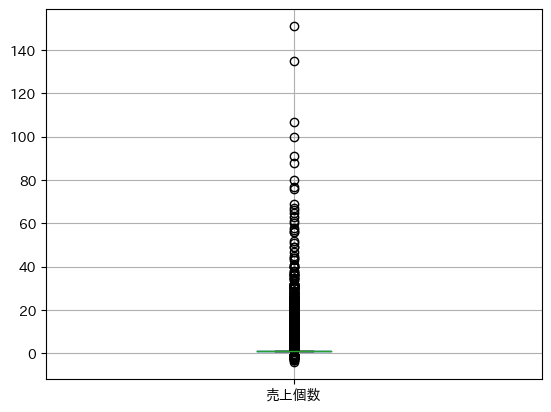

In [7]:
df.boxplot(column='売上個数')
plt.show()

- 売上個数閾値決定

In [8]:
threshold = 10  # 例: 閾値を適切な値に設定
anomalies = df[df['売上個数'] > threshold]

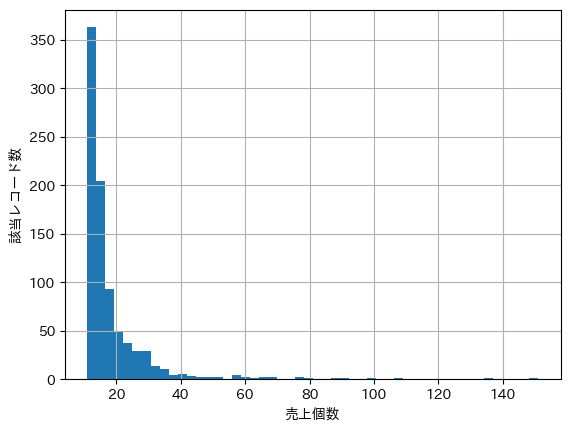

In [9]:
anomalies['売上個数'].hist(bins=50)
# プロットの設定
plt.xlabel('売上個数')
plt.ylabel('該当レコード数')
plt.show()

# データ可視化

- 店舗別の売り上げ合計推移

c:\Users\104161\Desktop\Project\MyProject\ManabiDX\Seminar\notebook\function\eda_sales_quantity_abnormal_value.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["日付"] = pd.to_datetime(df["日付"])


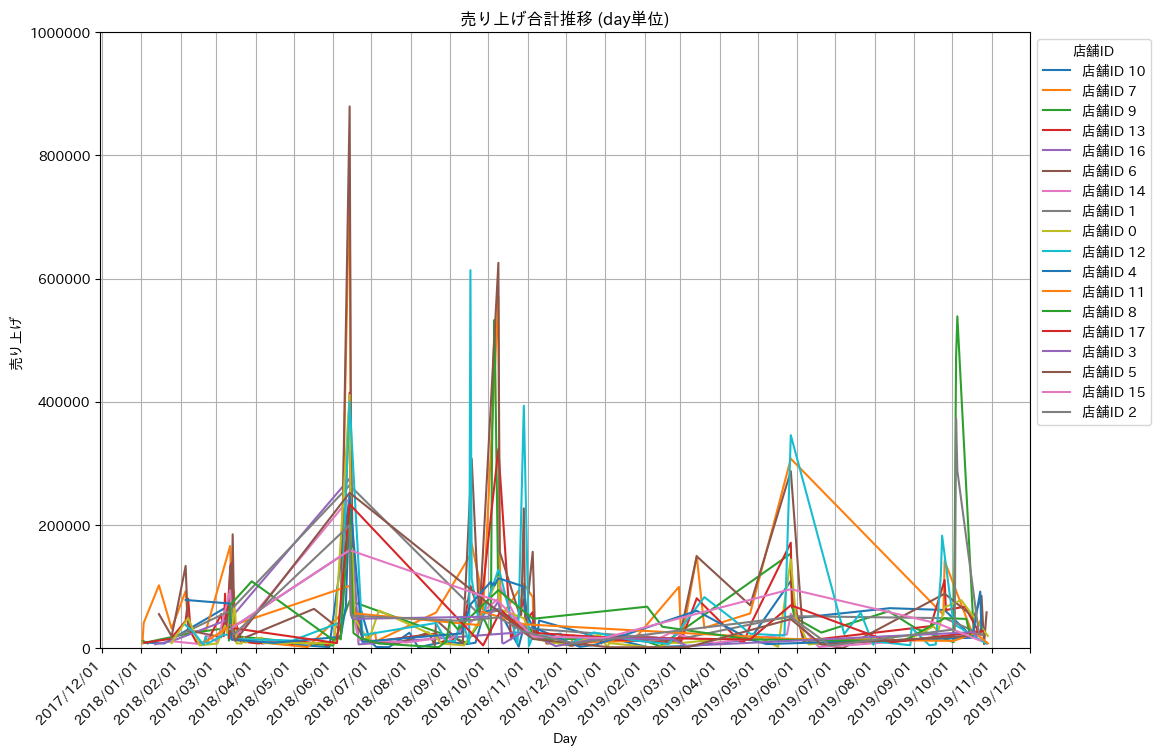

In [10]:
eda_sales_quantity_abnormal_value.plot_total_sales_by_store(df=anomalies, unit='day', separate_plots=False)

# カテゴリ別

c:\Users\104161\Desktop\Project\MyProject\ManabiDX\Seminar\notebook\function\eda_sales_quantity_abnormal_value.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["日付"] = pd.to_datetime(df["日付"])


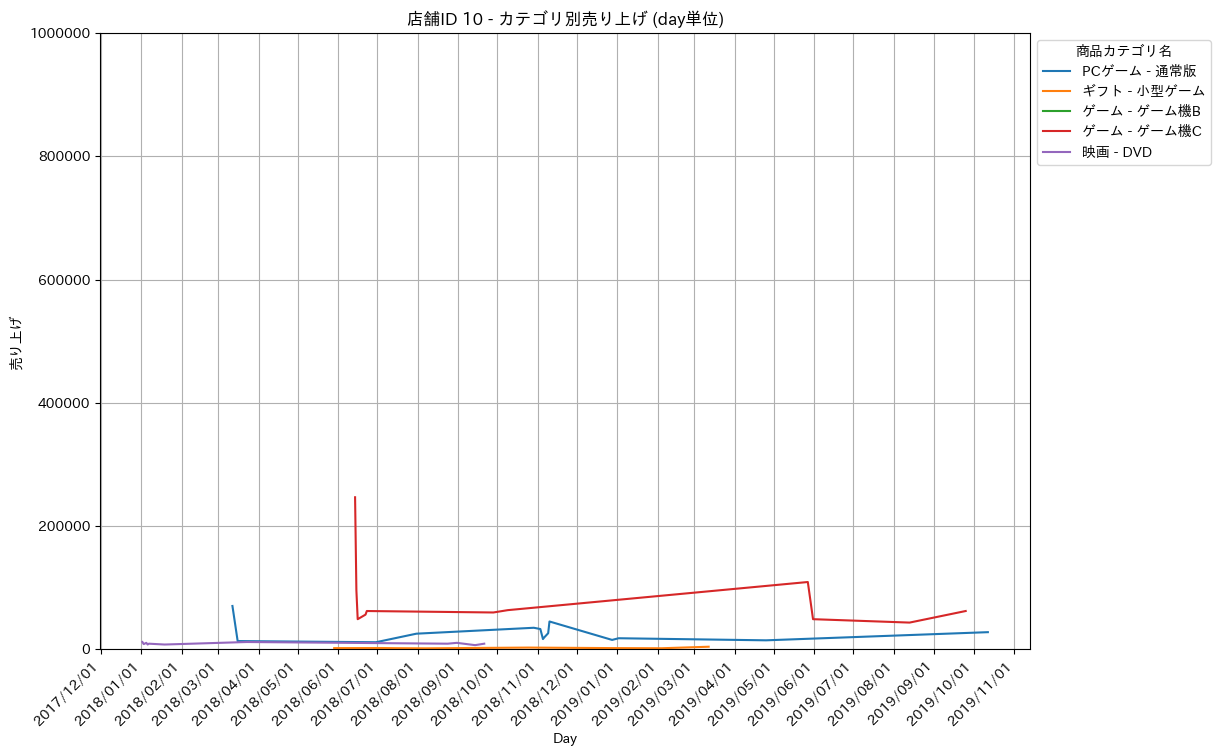

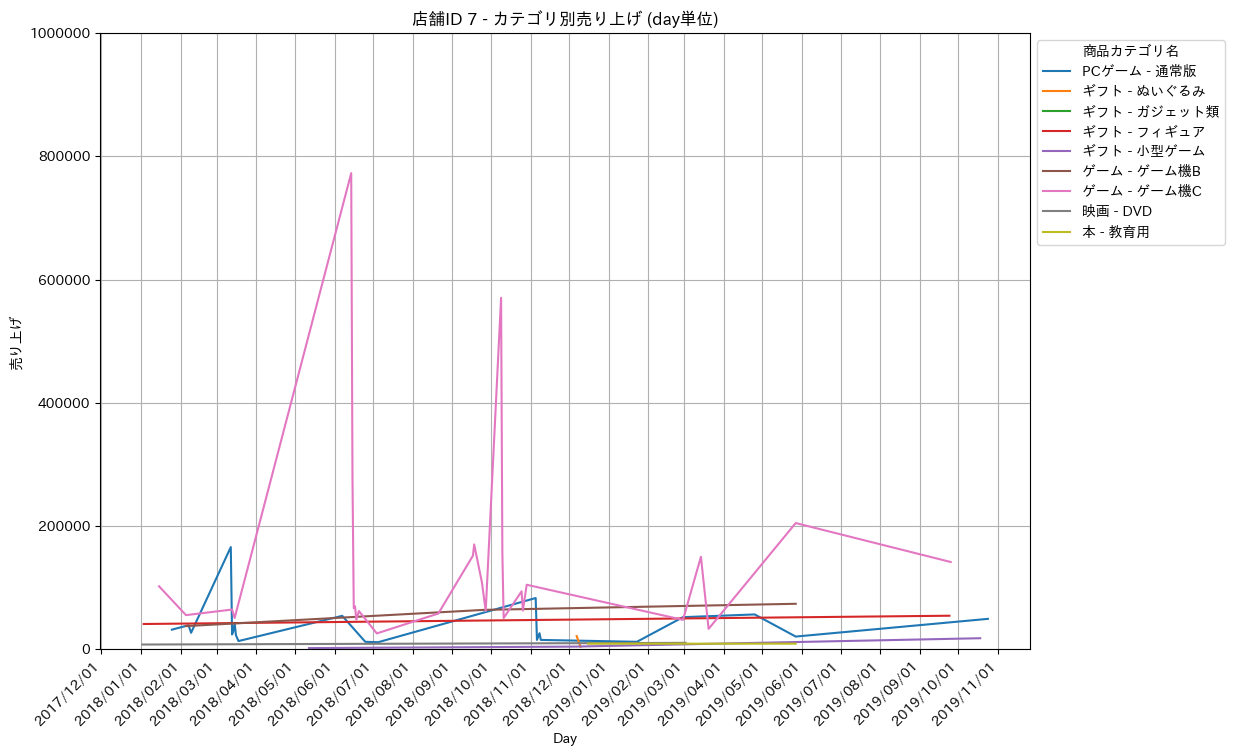

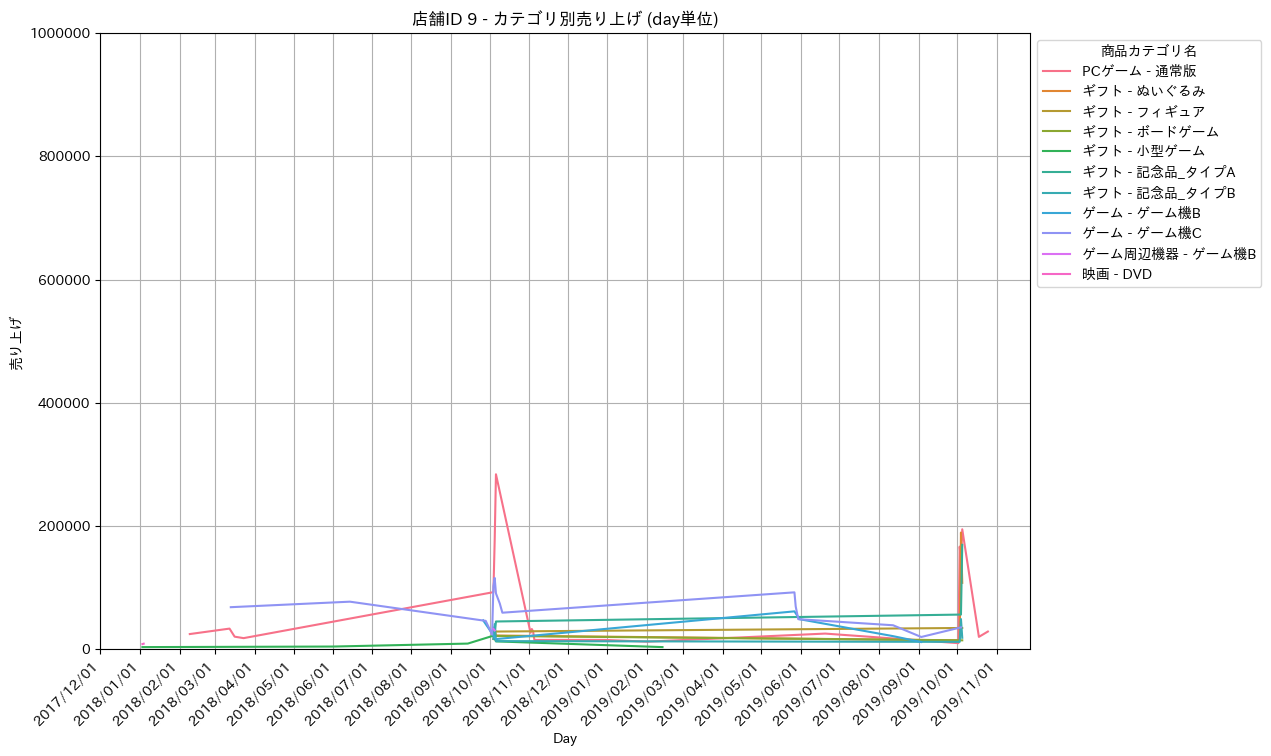

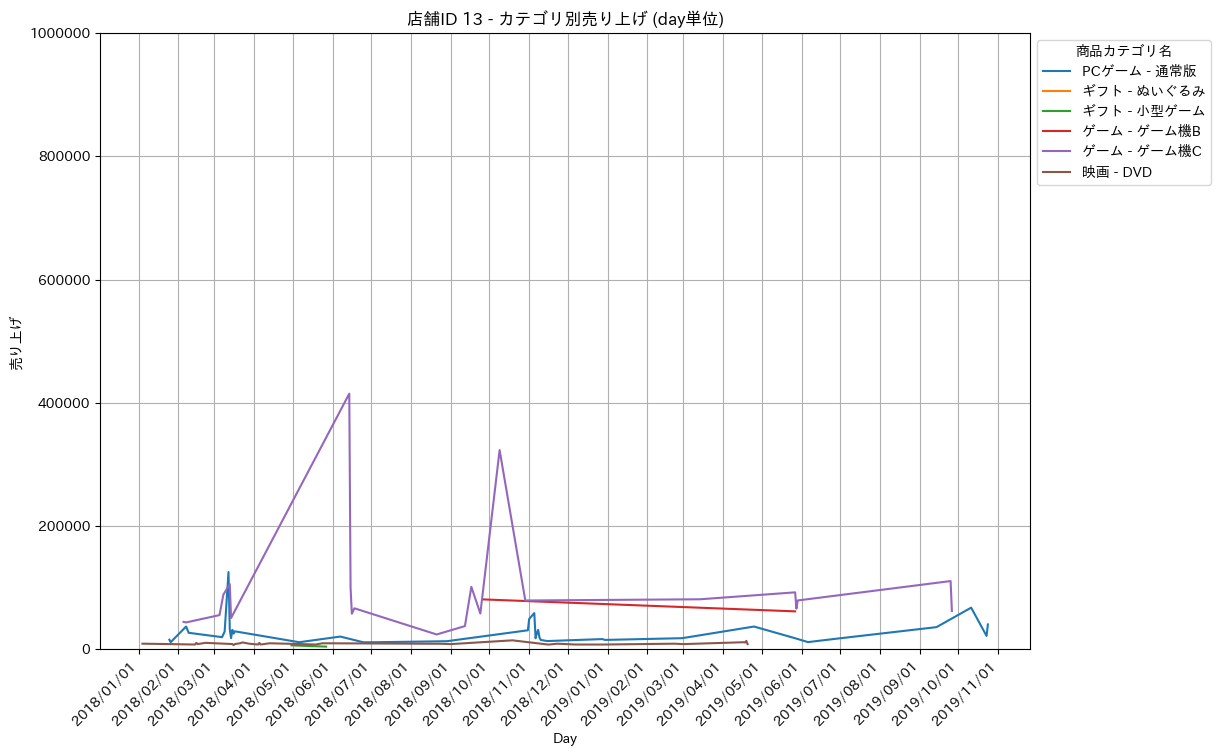

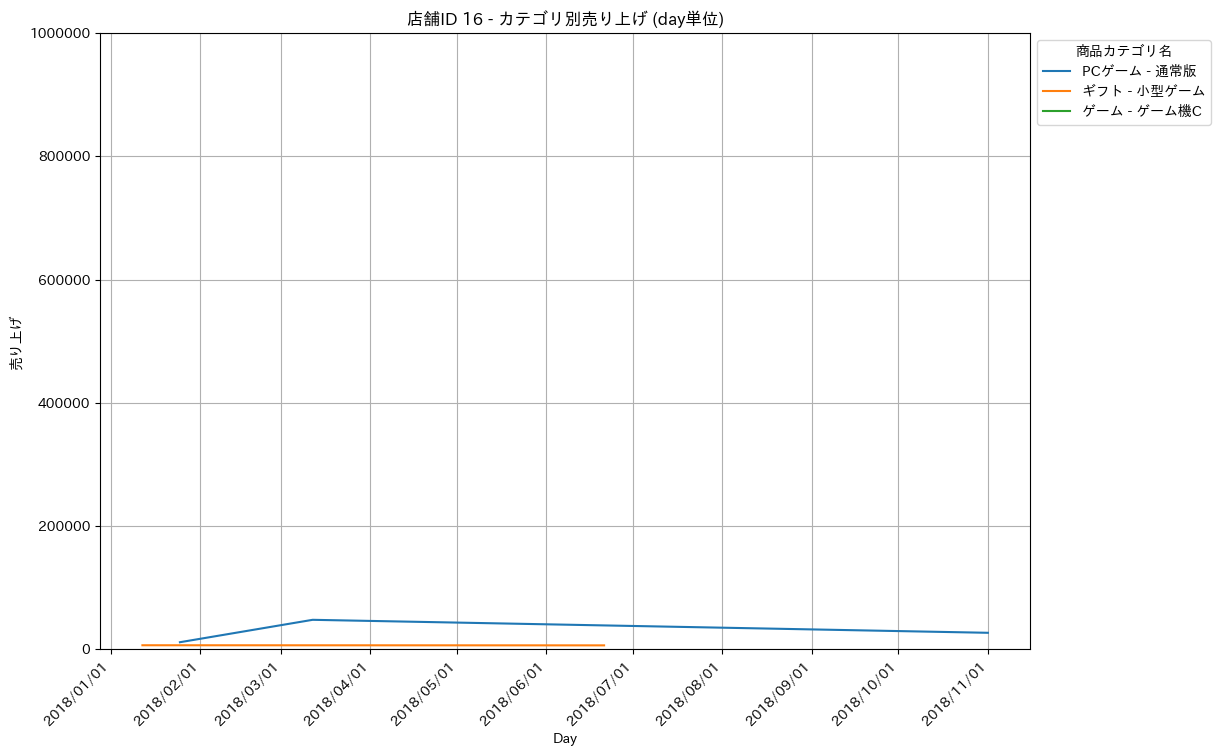

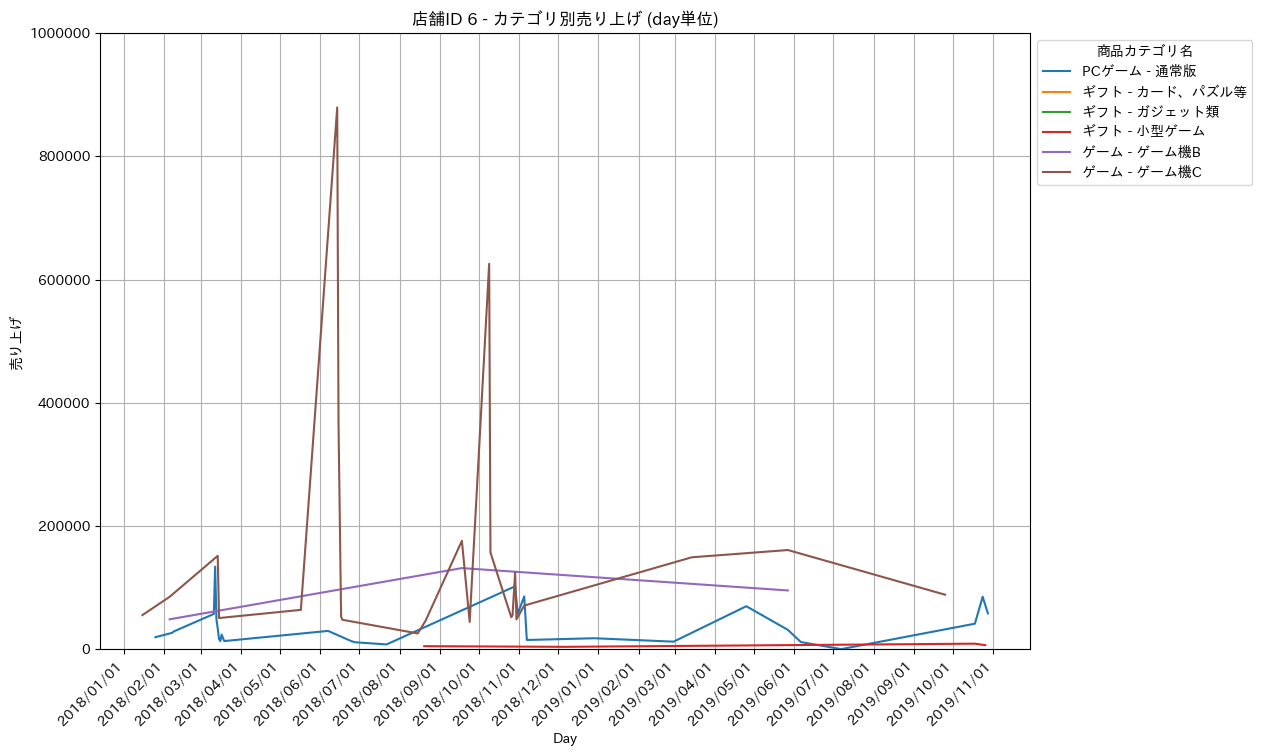

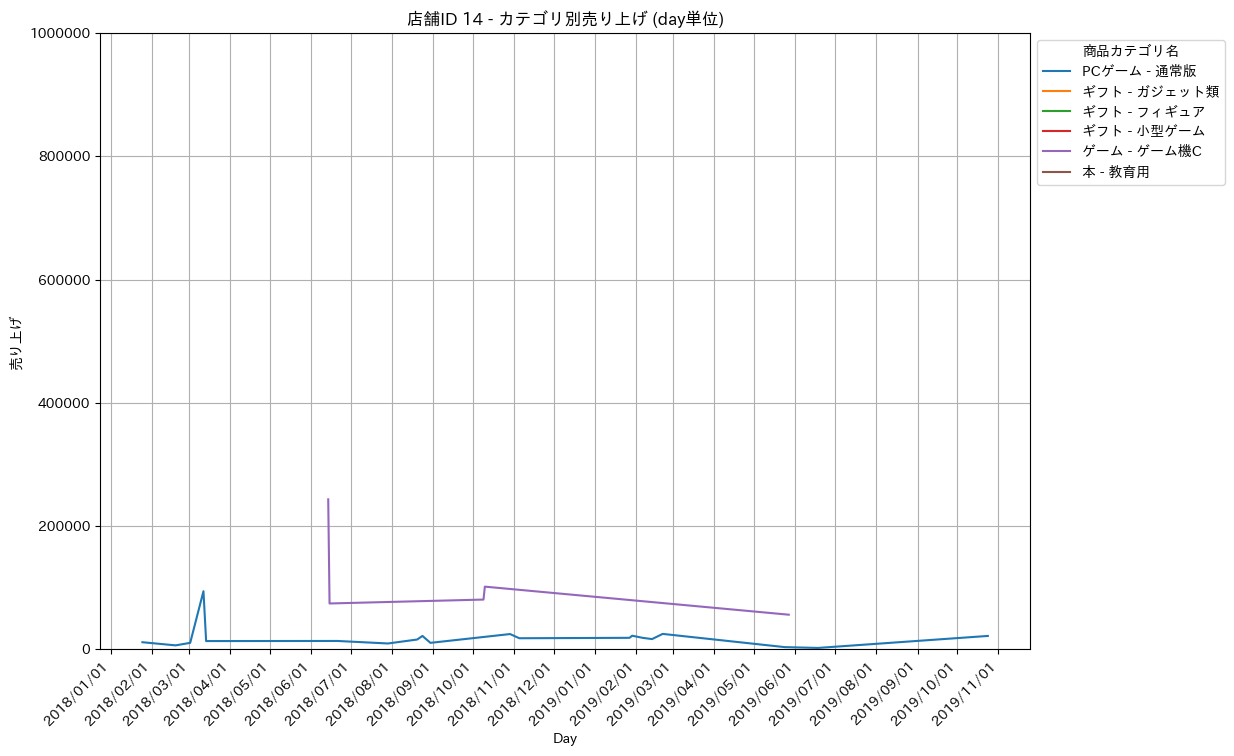

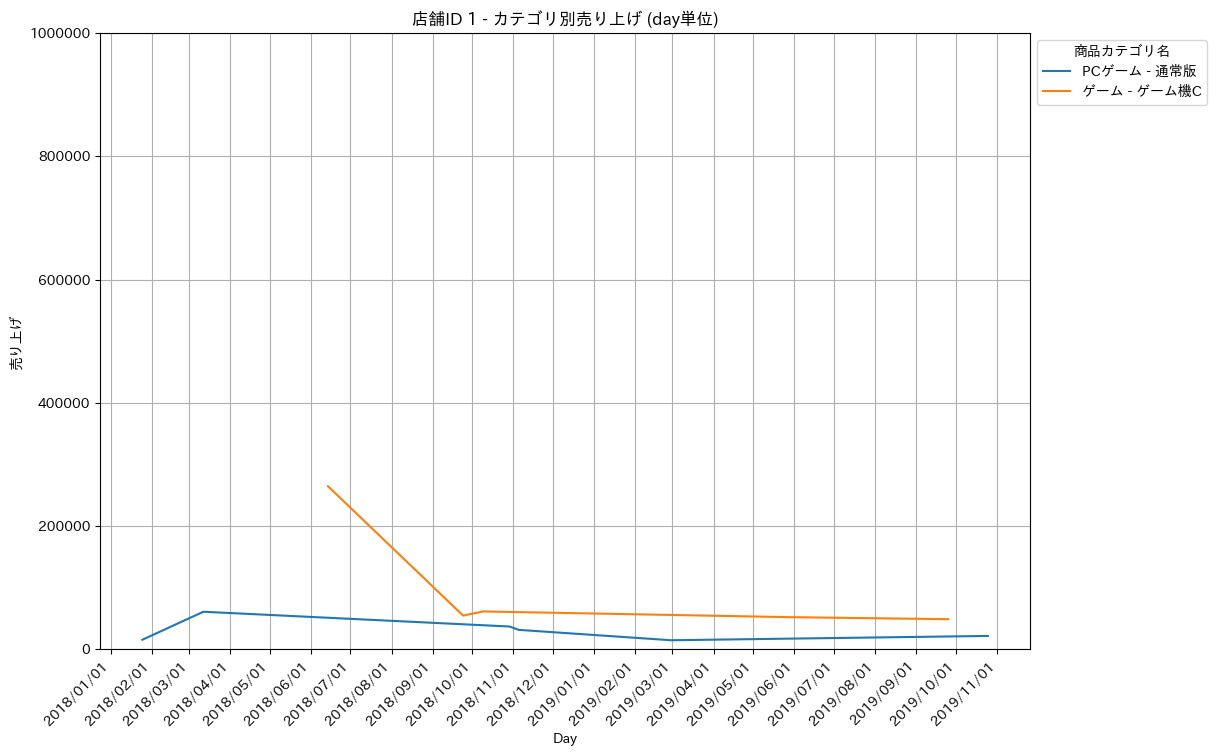

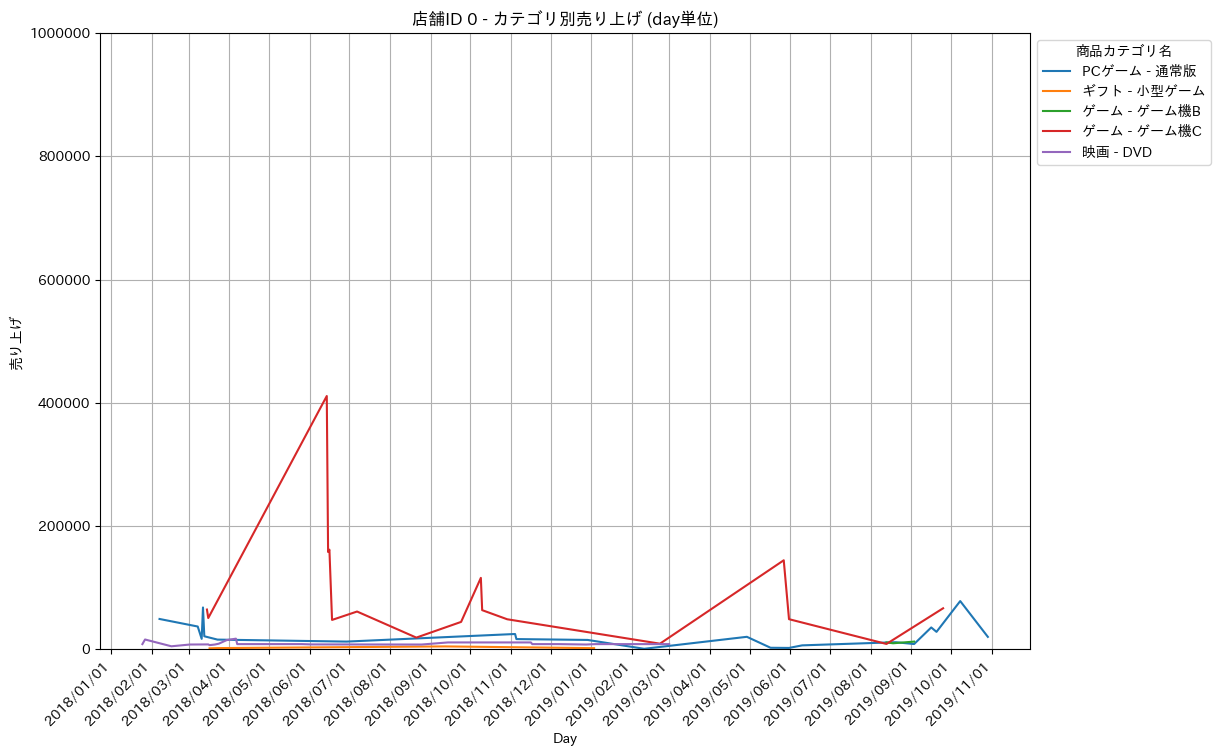

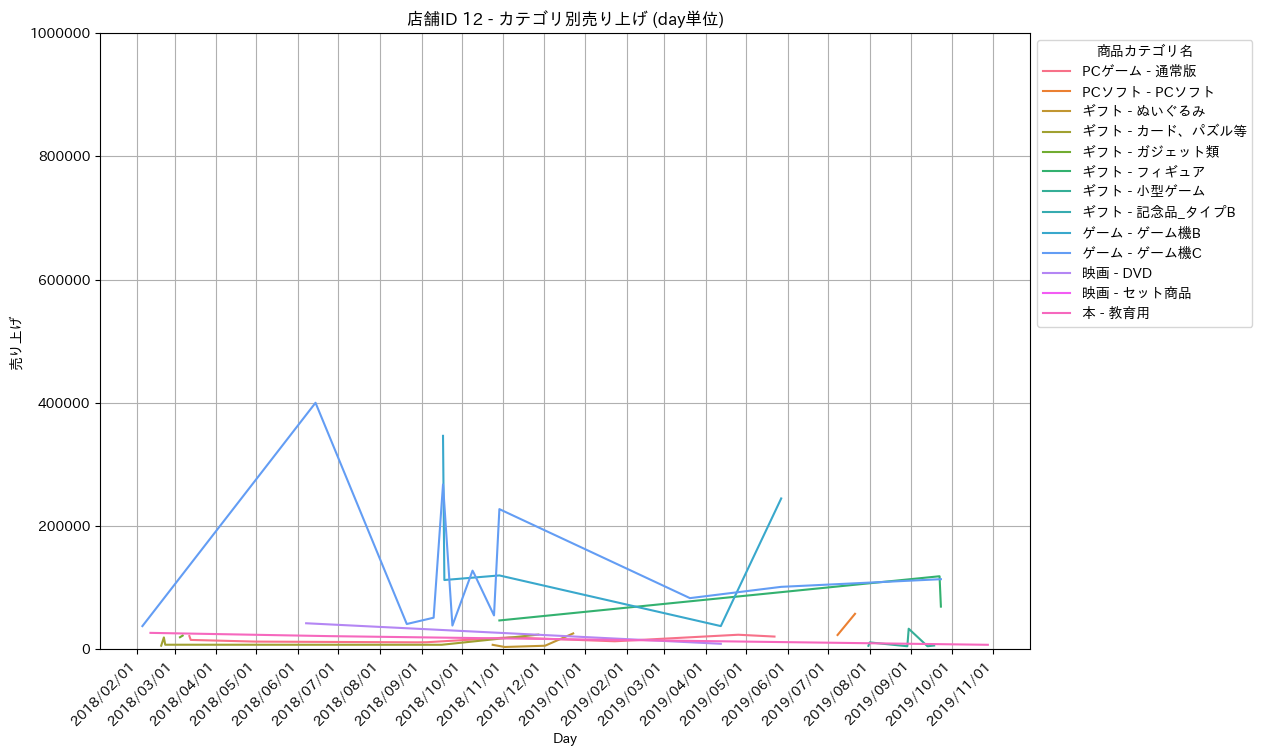

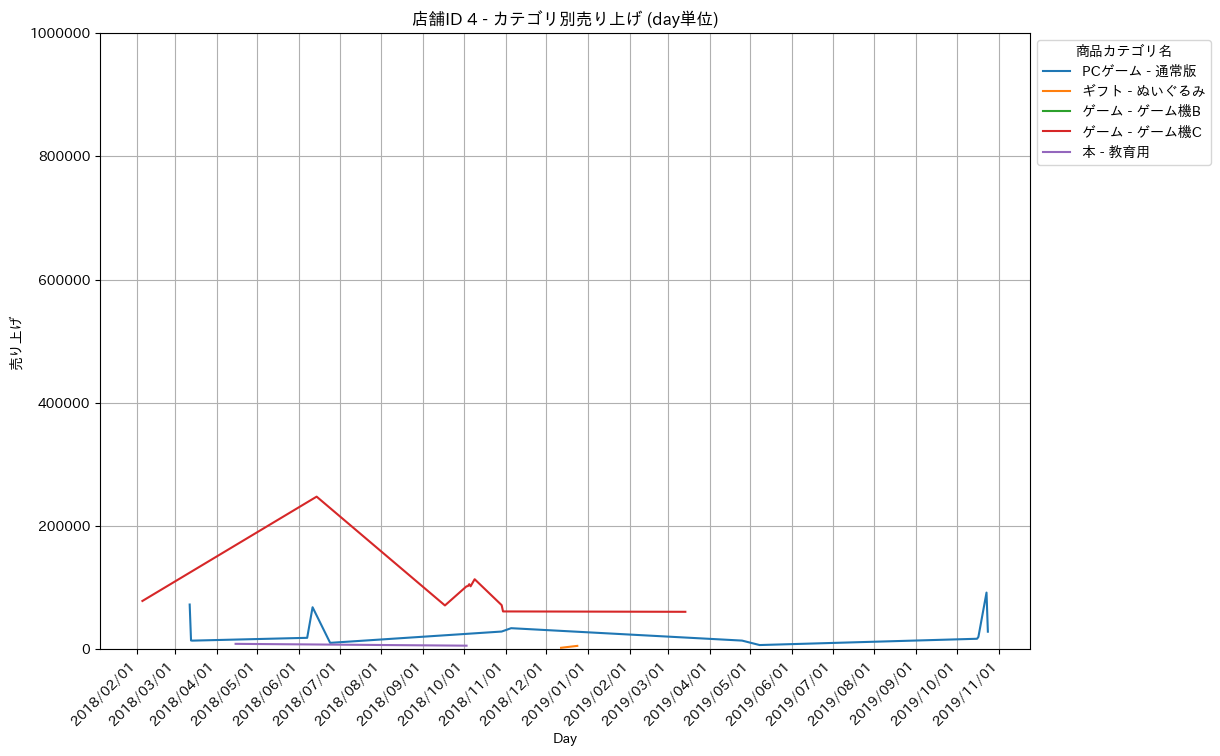

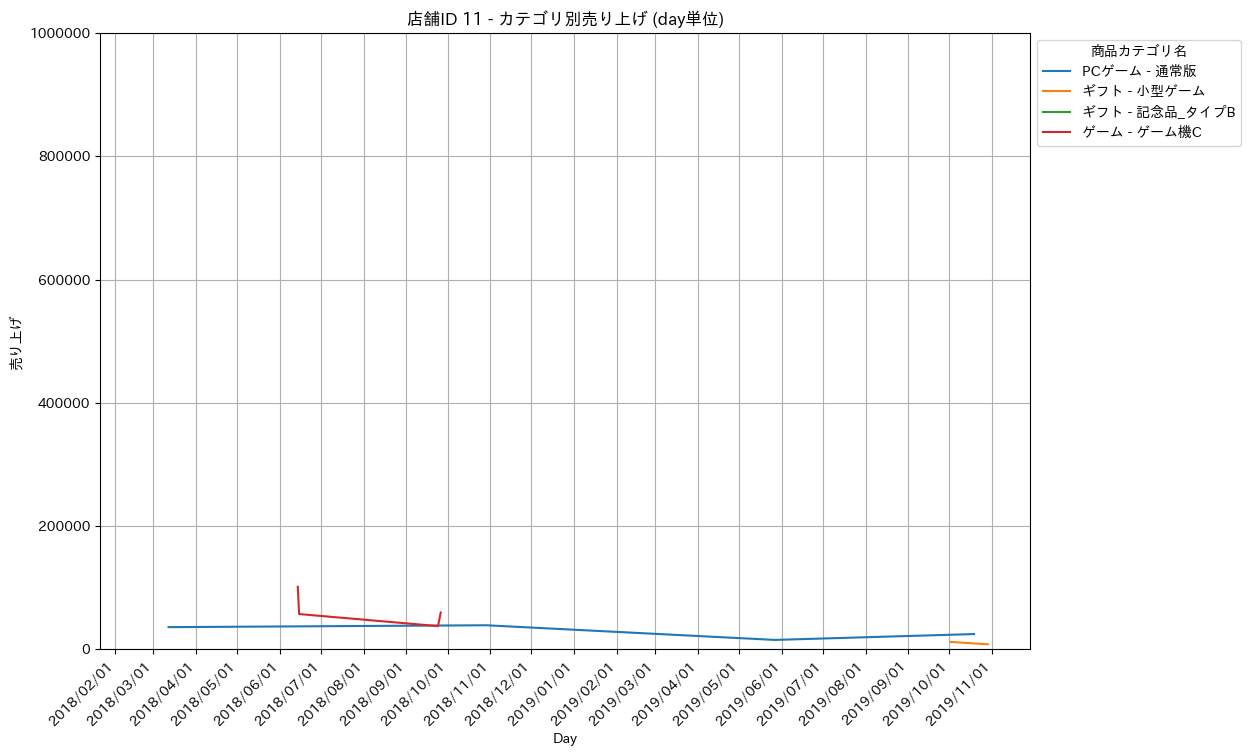

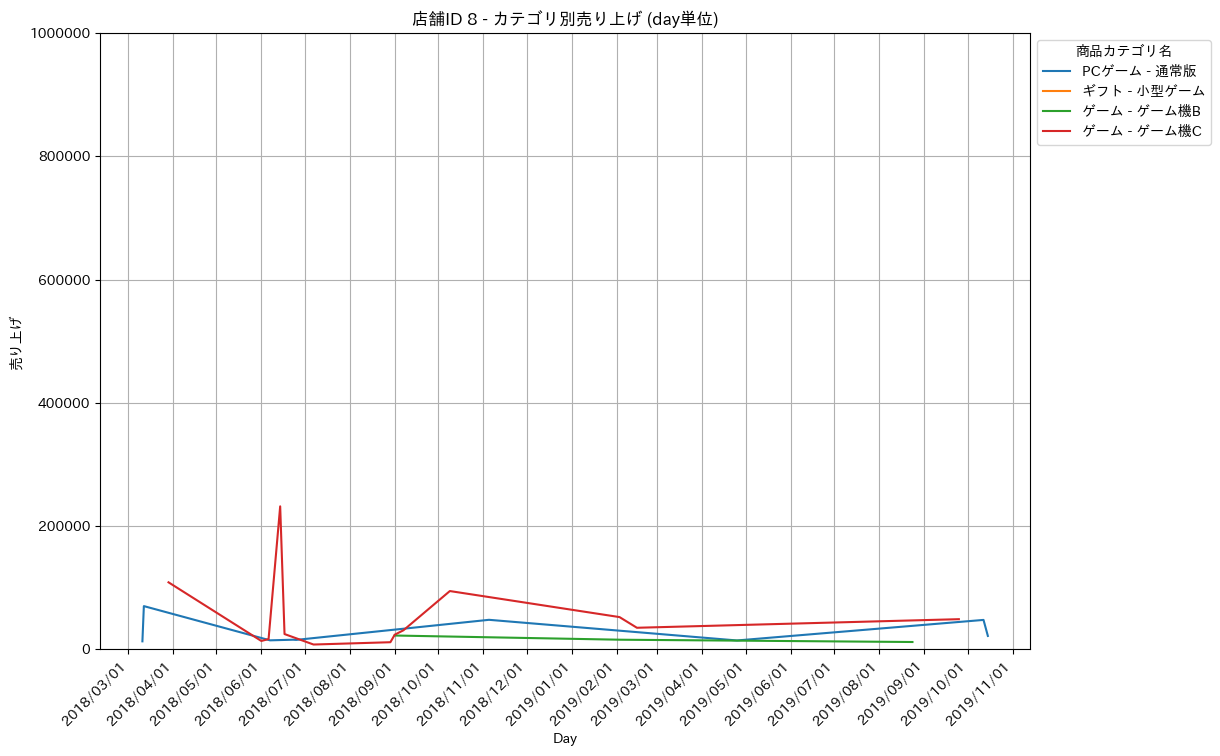

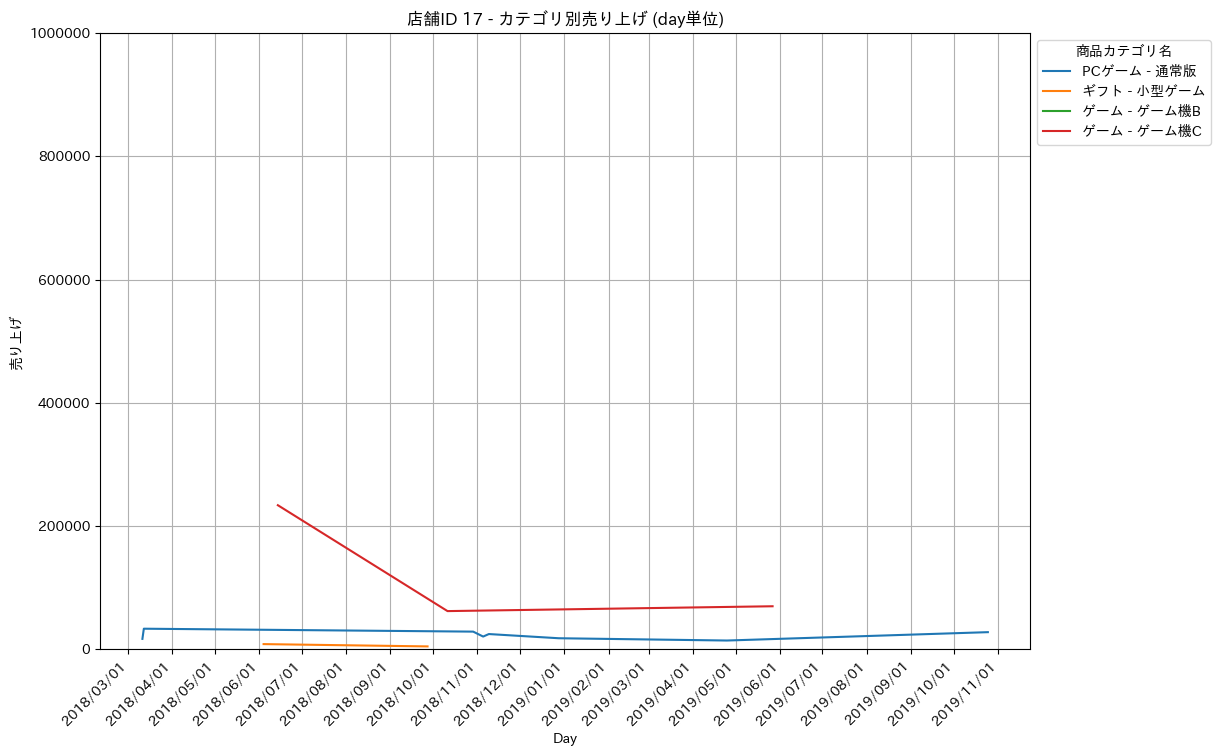

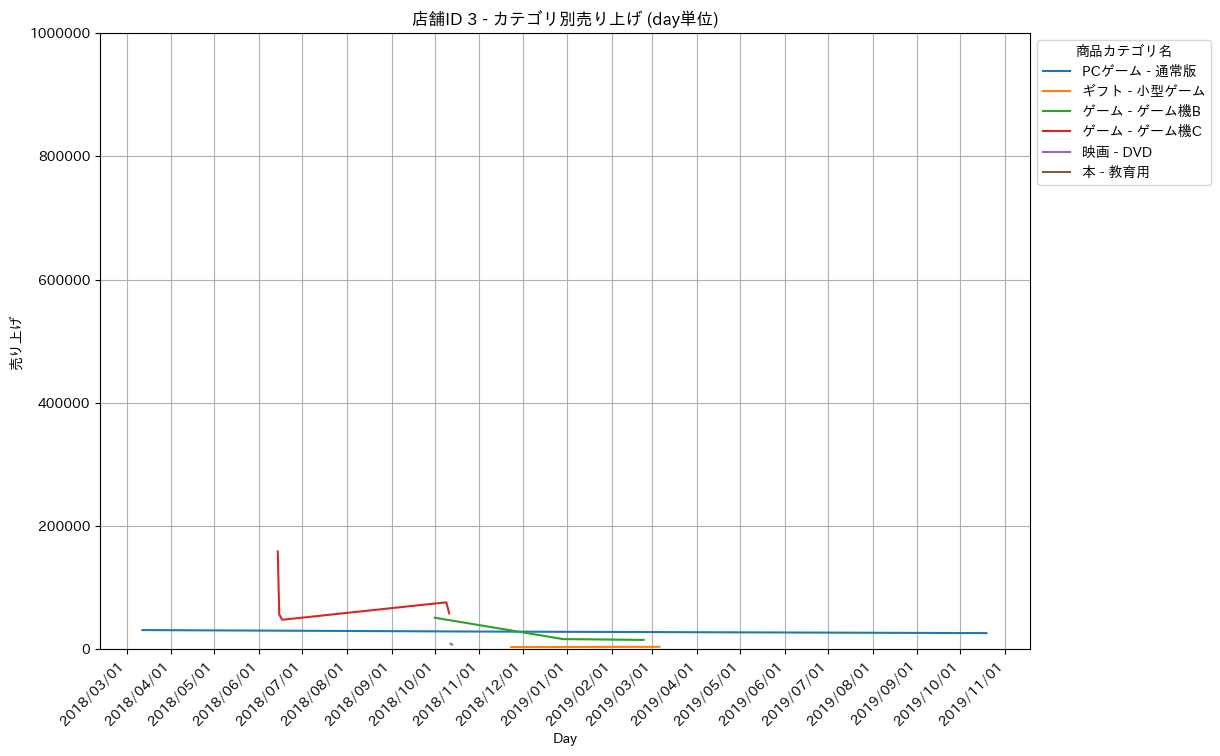

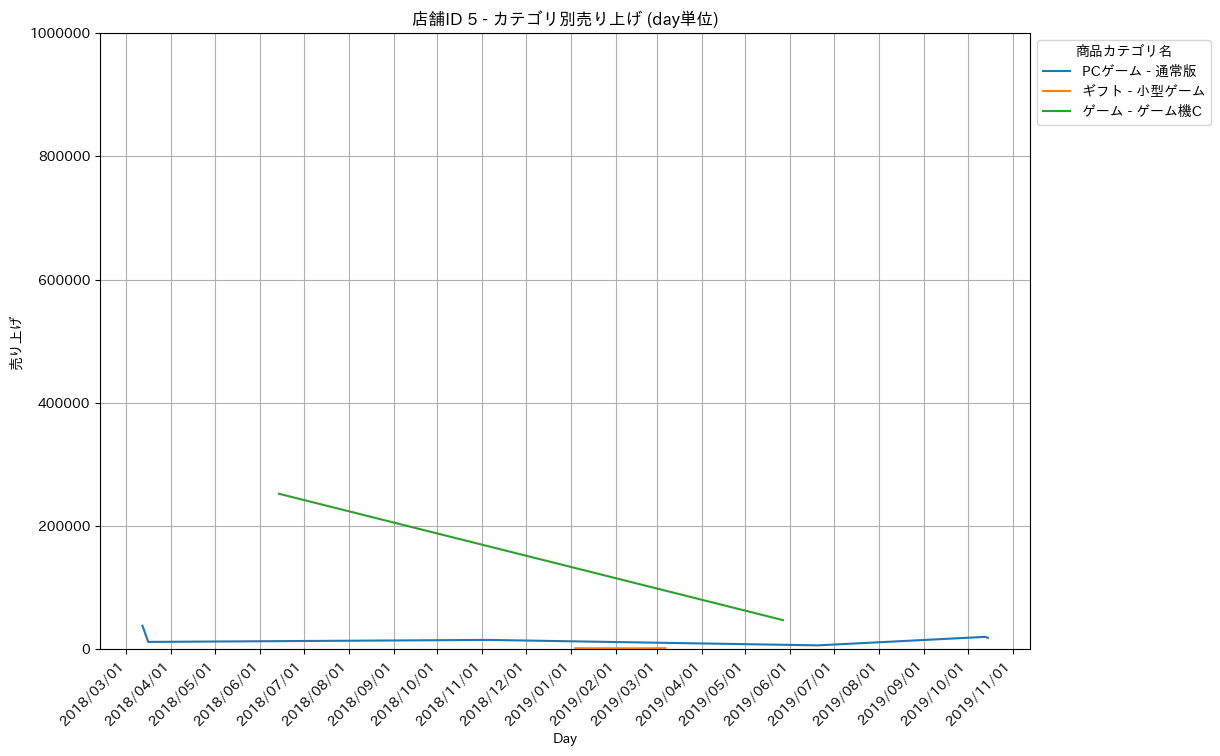

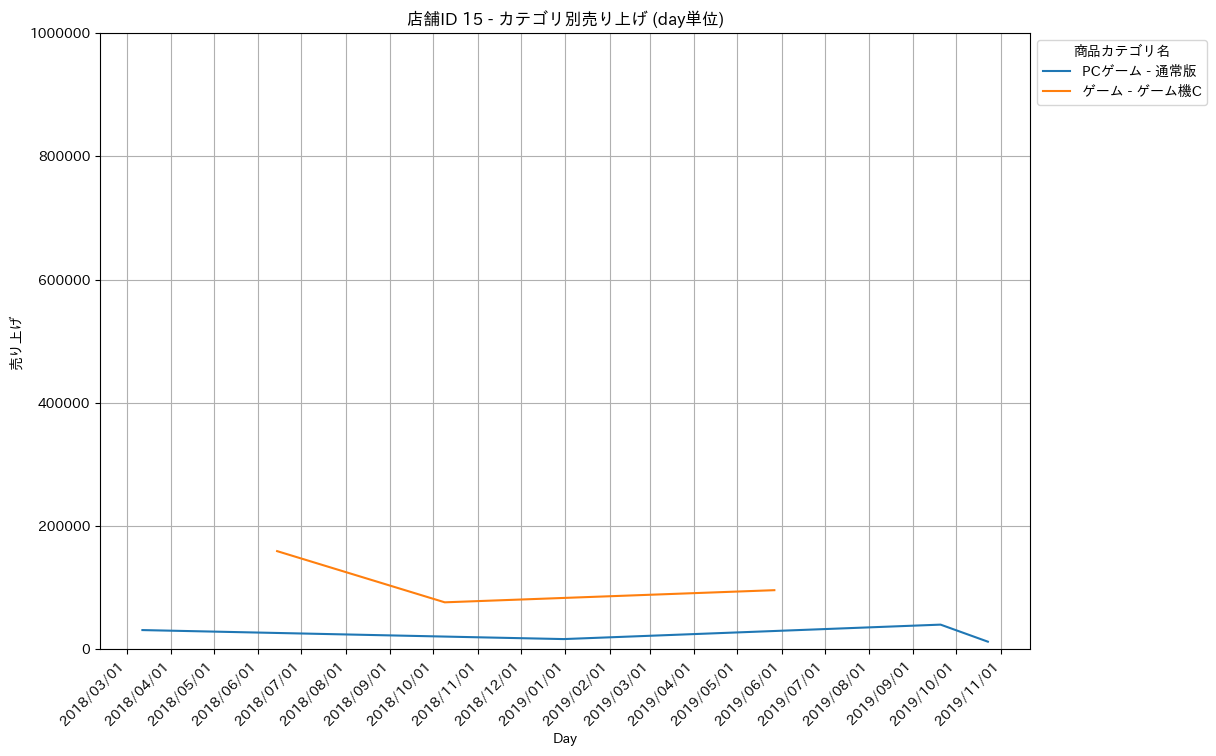

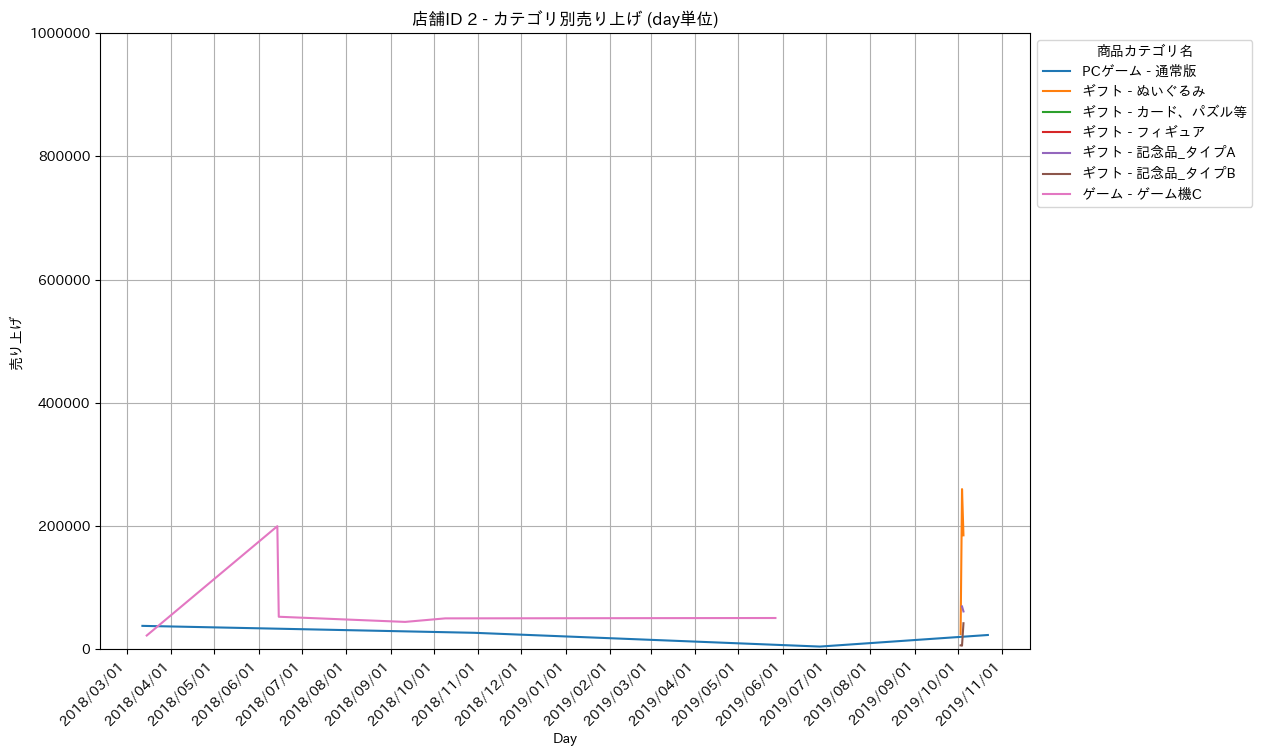

In [11]:
eda_sales_quantity_abnormal_value.plot_sales_by_store_category(df=anomalies, unit='day', separate_plots=True)